In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Lidar com preparação de dados.
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)

from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

# Parâmetros estéticos dos gráficos:
set_palette = "Paired"
axes_style = "ticks"

linha = 50*"-"

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
nomeDaBase = "./data/agrupamento.csv"
df = pd.read_csv(nomeDaBase, encoding="utf-8")

df.head()

,x0,x1,x2,x3,x4
0,5.447043,6.319084,2.664620,6.568743,4.802295
1,4.875562,4.796801,2.154231,6.832907,5.321401
2,5.582920,5.060775,1.895917,6.004299,6.330105
3,6.370727,3.717727,1.729007,5.923414,4.533557
4,4.789262,4.510056,0.669330,7.731273,4.272356


In [3]:
scaler = StandardScaler()

df_tratado = scaler.fit_transform(df)

df_tratado = pd.DataFrame(df_tratado, columns=df.columns)
df_tratado.head()

,x0,x1,x2,x3,x4
0,1.466029,1.438710,0.256044,0.618775,1.086416
1,1.147468,0.825259,0.048281,0.692792,1.345877
2,1.541771,0.931636,-0.056871,0.460623,1.850050
3,1.980919,0.390412,-0.124815,0.437960,0.952095
4,1.099362,0.709706,-0.556177,0.944505,0.821541


In [4]:
model = AgglomerativeClustering(linkage="single", compute_full_tree=True, n_clusters=4, affinity="l1")

model.fit(df_tratado)

AgglomerativeClustering(affinity='l1', compute_full_tree=True, linkage='single',
                        n_clusters=4)

In [5]:
print(model.affinity)
print(model.connectivity)

l1
None


In [6]:
# Função pega em https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

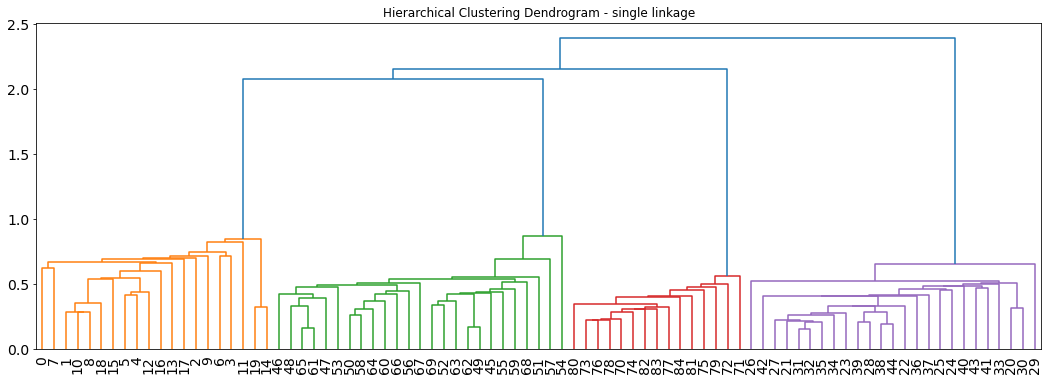

In [7]:
model = AgglomerativeClustering(linkage="single", compute_full_tree=True, distance_threshold=1, n_clusters=None)
model.fit(df_tratado)
# model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage=linkage_type)

# model = model.fit(df_scaled_pca.drop(["labs"], axis=1), df_scaled_pca["labs"].values)

# plot the top three levels of the dendrogram
plt.figure(figsize=(18, 6))
plt.title('Hierarchical Clustering Dendrogram - single linkage')
plot_dendrogram(model, truncate_mode=None, labels=df_tratado.index.tolist())
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

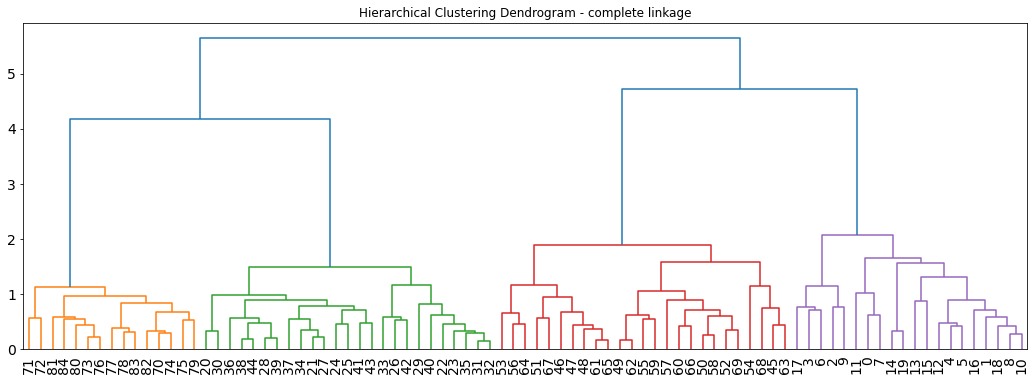

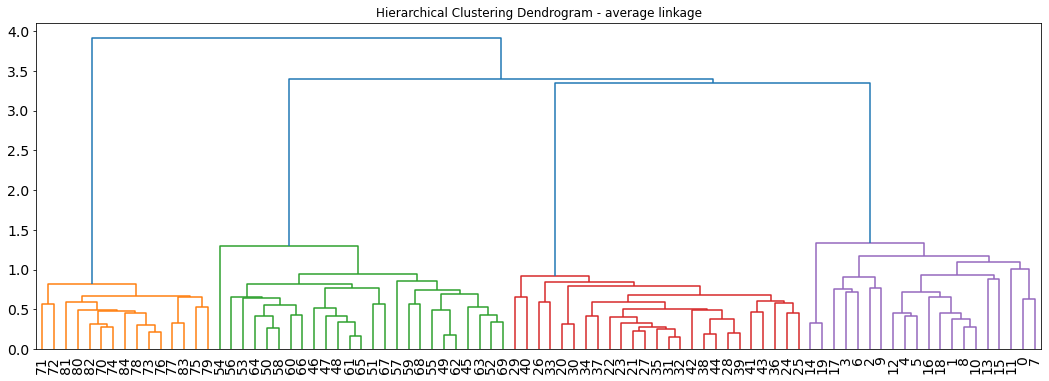

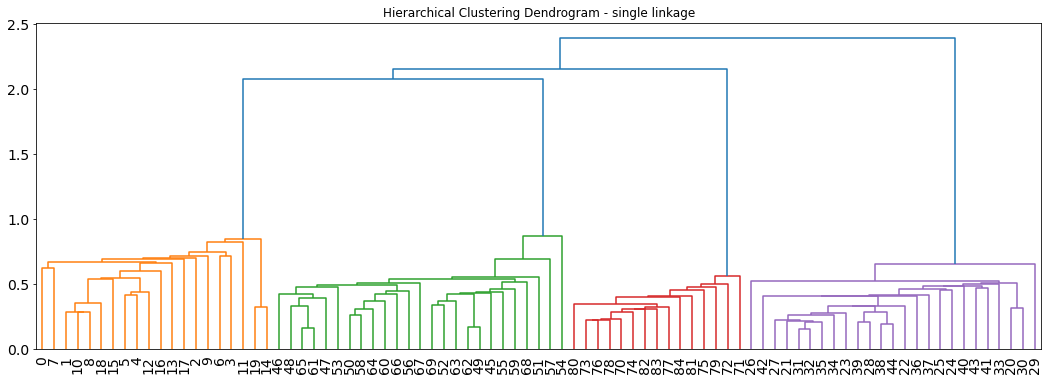

In [8]:
list_linkage = ["complete", "average", "single"]

for linkage_type in list_linkage:

    model = AgglomerativeClustering(linkage=linkage_type, compute_full_tree=True, distance_threshold=1, n_clusters=None, affinity="euclidean")
    model.fit(df_tratado)

    # plot the top three levels of the dendrogram
    plt.figure(figsize=(18, 6))
    plt.title('Hierarchical Clustering Dendrogram - '+linkage_type+' linkage')
    plot_dendrogram(model, truncate_mode=None, labels=df_tratado.index.tolist())
    plt.xticks(rotation=90)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [9]:
df_tratado.head()

,x0,x1,x2,x3,x4
0,1.466029,1.438710,0.256044,0.618775,1.086416
1,1.147468,0.825259,0.048281,0.692792,1.345877
2,1.541771,0.931636,-0.056871,0.460623,1.850050
3,1.980919,0.390412,-0.124815,0.437960,0.952095
4,1.099362,0.709706,-0.556177,0.944505,0.821541


In [10]:
threshold = 0
model = AgglomerativeClustering(linkage="average", compute_full_tree=True, distance_threshold=threshold, n_clusters=None, affinity="euclidean")
y_pred = model.fit_predict(df_tratado)

print(f"""Distâncias:
{model.distances_}
""")

print(f"""Clusters:
{model.n_clusters_}
""")

print(f"""Labels:
{model.labels_}
""")

threshold = 1
model = AgglomerativeClustering(linkage="average", compute_full_tree=True, distance_threshold=threshold, n_clusters=None, affinity="euclidean")
y_pred = model.fit_predict(df_tratado)

print(f"""Distâncias:
{model.distances_}
""")

print(f"""Clusters:
{model.n_clusters_}
""")

print(f"""Labels:
{model.labels_}
""")

Distâncias:
[0.15115801 0.16335523 0.17282843 0.18982599 0.20583789 0.22027474
 0.22715496 0.24838736 0.25881259 0.27595979 0.28208437 0.28374403
 0.2984855  0.31876758 0.32089431 0.32445422 0.32701608 0.3279112
 0.34169033 0.34532666 0.38123726 0.38348581 0.39831837 0.4142234
 0.41827222 0.41961171 0.42035577 0.42241298 0.42356222 0.45201509
 0.45479048 0.45730822 0.45779441 0.47048491 0.47418773 0.48674269
 0.48926053 0.4945041  0.50286266 0.51864964 0.52492946 0.52940814
 0.55006543 0.56817781 0.57140231 0.57193866 0.57770345 0.5876855
 0.59037092 0.59197331 0.60220988 0.62370142 0.64018699 0.6516869
 0.65301916 0.65385268 0.65554226 0.66950814 0.68022734 0.69370903
 0.71439602 0.71692893 0.73896015 0.76198848 0.76443229 0.76540167
 0.79291605 0.81597455 0.82198419 0.84408611 0.85730065 0.87905929
 0.90708854 0.91967413 0.9365539  0.94666994 1.0038994  1.09758308
 1.1701731  1.29538172 1.3287906  3.35011289 3.39511737 3.90930644]

Clusters:
85

Labels:
[67 64 79 49 61 42 75 69 74 43

In [15]:
df_tratado.head()

,x0,x1,x2,x3,x4
0,1.466029,1.438710,0.256044,0.618775,1.086416
1,1.147468,0.825259,0.048281,0.692792,1.345877
2,1.541771,0.931636,-0.056871,0.460623,1.850050
3,1.980919,0.390412,-0.124815,0.437960,0.952095
4,1.099362,0.709706,-0.556177,0.944505,0.821541


In [24]:
model = AgglomerativeClustering(linkage="average", compute_full_tree=True, distance_threshold=None, n_clusters=4, affinity="euclidean")
y_pred = model.fit_predict(df_tratado)
df_tratado["y_pred"] = y_pred

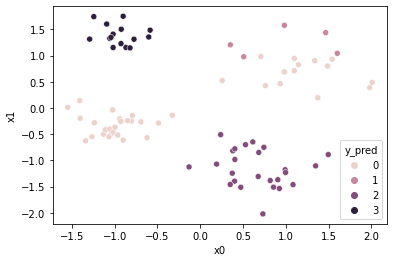

In [25]:
sns.set_palette(set_palette)
sns.axes_style(axes_style)

plt.subplots_adjust(wspace = .45)
ax = sns.scatterplot(x="x0", y="x1", hue="y_pred", data=df_tratado)